In [1]:
import numpy as np
import xray
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (4096*2 ,4096*2))
resource.getrlimit(resource.RLIMIT_NOFILE)


(8192, 8192)

In [3]:
import xgcm
import jmd95

In [4]:
iters = range(480, 210240, 480)
#iters = range(48,120720+1,96)
ddir = '/data/scratch/rpa/SOSE/run_np240'
ds = xray.decode_cf(xgcm.open_mdsdataset(ddir, iters, prefix=['SOstt_5d'], #prefix=['TSUVWP_1d',],
                             deltaT=900, ref_date='2005-01-01 00:00:00', calendar='gregorian'))
ds

/home/rpa/xgcm/xgcm/mdsxray.py:243: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/rpa/xgcm/xgcm/mdsxray.py:243: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xray.Dataset>
Dimensions:  (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 437)
Coordinates:
  * Xp1      (Xp1) float32 5.55112e-17 0.166667 0.333333 0.5 0.666667 ...
  * Zl       (Zl) float32 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 ...
  * Yp1      (Yp1) float32 -77.9583 -77.7916 -77.625 -77.4583 -77.2916 ...
  * Zp1      (Zp1) float32 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 ...
  * Y        (Y) float32 -77.875 -77.7083 -77.5416 -77.375 -77.2083 -77.0416 ...
  * X        (X) float32 0.0833333 0.25 0.416667 0.583333 0.75 0.916667 ...
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 -53.0 -68.0 -85.0 -104.0 ...
  * Zu       (Zu) float32 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 2005-01-16 ...
Data variables:
    YC       (Y, X) float32 -77.875 -77.875 -77.875 -77.875 -77.875 -77.875 ...
    YG       (Yp1, Xp1) float32 -77.9583 -77.9583 -77.9583 -77.9583 -77.9583 ...
    rA       

In [5]:
# select a particular level
klev = 19
dslev = ds.isel(Zl=klev, Z=klev, Zp1=klev+1)
dslev

<xray.Dataset>
Dimensions:  (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Zu: 42, time: 437)
Coordinates:
  * Xp1      (Xp1) float32 5.55112e-17 0.166667 0.333333 0.5 0.666667 ...
    Zl       float32 -624.0
  * Yp1      (Yp1) float32 -77.9583 -77.7916 -77.625 -77.4583 -77.2916 ...
    Zp1      float32 -718.0
  * Y        (Y) float32 -77.875 -77.7083 -77.5416 -77.375 -77.2083 -77.0416 ...
  * X        (X) float32 0.0833333 0.25 0.416667 0.583333 0.75 0.916667 ...
    Z        float32 -671.0
  * Zu       (Zu) float32 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 -94.0 -114.0 ...
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 2005-01-16 ...
Data variables:
    YC       (Y, X) float32 -77.875 -77.875 -77.875 -77.875 -77.875 -77.875 ...
    YG       (Yp1, Xp1) float32 -77.9583 -77.9583 -77.9583 -77.9583 -77.9583 ...
    rA       (Y, X) float32 7.21182e+07 7.21182e+07 7.21182e+07 7.21182e+07 ...
    PHrefC   float32 6582.51
    PHrefF   float32 7043.58
    dxG      (Yp1, X) float32 3865.71 3865.71

In [18]:
rholevs = np.load('../data/rholevs.npy')
Nrho = len(rholevs)
w_sig = np.zeros(Nrho+1, dtype='f8')

In [20]:
for n in xrange(dslev.dims['time']):
    salt = dslev.SALT[n]
    theta = dslev.THETA[n]
    sig0, _, _ = jmd95.eos.state_surface(theta.values, salt.values)
    bins = np.digitize(sig0.ravel(), rholevs)
    w_trans = (dslev.WVEL[n]*dslev.rA)
    w_trans -= w_trans.mean()
    w_sig_this = np.bincount(bins, weights=w_trans.values.ravel(), minlength=Nrho+1)
    if (n % 10)==0:
        print n, w_trans.sum().values, w_sig_this.sum()
    w_sig += w_sig_this

0 -31786.703125 -473.127189994
10 -496.361755371 -179.513824284
20 6264.50585938 546.43220371
30 -8752.27441406 150.003195763
40 -11783.7392578 448.414009094
50 6470.16601562 108.44491291
60 5064.12207031 419.593153954
70 8008.17773438 110.664766788
80 -4457.33154297 526.242936373
90 5475.53808594 -712.025070779
100 8996.01953125 -147.226190567
110 2160.21704102 16.4127368927
120 14396.75 300.425526619
130 11282.0615234 -540.064923286
140 -4998.77490234 -153.197441101
150 -8989.09863281 64.5842558146
160 18139.7949219 -326.218199372
170 9213.69921875 507.787810326
180 -9506.97460938 -13.9671039581
190 -9887.97265625 -219.437026978
200 8677.1640625 1133.72239113
210 -1390.7557373 -321.596536636
220 -65909.734375 -185.778779984
230 -82606.5625 197.138109207
240 59920.0039062 129.016283989
250 -7641.72607422 -476.759916067
260 -5901.70019531 419.663805008
270 -40703.1289062 618.756334782
280 33467.6328125 -616.278499603
290 -85620.9296875 -161.821126938
300 -58809.9453125 -274.465005875
3

In [21]:
drho = np.diff(rholevs)
rho = 0.5*(rholevs[1:] + rholevs[:-1]) - 1000

In [22]:
formation = w_sig[1:-1] / dslev.dims['time'] / drho
transformation = np.cumsum(w_sig[::-1] / dslev.dims['time'])[::-1]

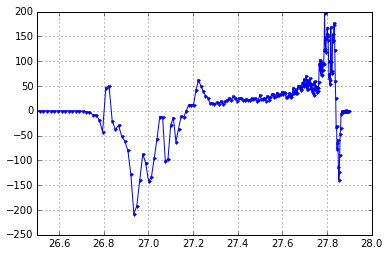

In [23]:
plt.plot(rho, formation/1e6, '.-')
plt.xlim(26.5,28)
plt.grid()

(26.5, 28)

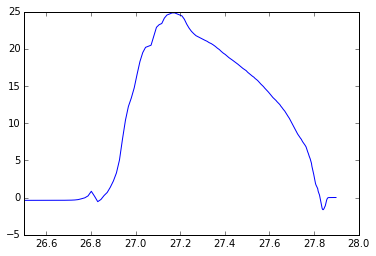

In [24]:
plt.plot(rholevs-1000, transformation[1:]/1e6)
plt.xlim(26.5,28)

In [13]:
from pygamman import gamman

In [16]:
t, s, lon, lat = xray.broadcast_arrays(dslev.THETA[n], dslev.SALT[n], dslev.XC, dslev.YC)
#gamman = gamman.gamma_n()

In [17]:
N = len(s.ravel())
gn, _, _ = gamman.gamma_n(s.ravel(), t.ravel(), 700, lon, lat)

TypeError: Required argument 'alat' (pos 6) not found

In [25]:
vol = ds.HFacC * ds.rA * ds.drF

In [40]:
n = 0

def get_volume_dist(n):
    sig0, _, _ = jmd95.eos.state_surface(ds.THETA[n].values.ravel(), ds.SALT[n].values.ravel())
    sig0.shape = ds.THETA[n].shape
    bins = np.digitize(sig0[:klev].ravel(), rholevs)
    vol_sig0 = np.bincount(bins, weights=vol[:klev].values.ravel(), minlength=Nrho+1)
    return vol_sig0

In [43]:
Nt = len(ds.time)
vol_init = get_volume_dist(0)
vol_fin = get_volume_dist(Nt-1)

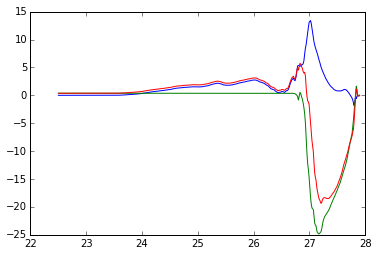

In [53]:
vol_diff = (vol_fin - vol_init)
DT = Nt * 5* (24*60*60.)
rearrangement = np.cumsum(vol_diff) / DT
plt.plot(rholevs-1000, -rearrangement[1:] / 1e6)
plt.plot(rholevs-1000, -transformation[1:] / 1e6)
plt.plot(rholevs-1000, (-rearrangement[1:] -transformation[1:] ) / 1e6)


In [54]:
# this is not really a proper volume budget... what about the open boundary!